# Infrastructure Investments & Jobs Act Funding

In [474]:
# import packages

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import openpyxl
import requests
from io import BytesIO

In [475]:
#check working directory
os.getcwd()

'/Users/field/Desktop/CUNY/data_608/data_608_assignments'

In [476]:
#import data
iija = pd.DataFrame(pd.read_excel('data/IIJA FUNDING AS OF MARCH 2023.xlsx'))

In [477]:
#check data head
iija.head()

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000


In [478]:
# clean data
iija = iija.rename(columns = {'State, Teritory or Tribal Nation': 'State'})
iija['State'] = iija['State'].astype(str).str.strip().str.lower().str.replace(' ', '_')
iija.at[8,'State'] = 'delaware'
iija

,State,Total (Billions)
0,alabama,3.0000
1,alaska,3.7000
2,american_samoa,0.0686
3,arizona,3.5000
4,arkansas,2.8000
5,california,18.4000
6,colorado,3.2000
7,connecticut,2.5000
8,delaware,0.7920
9,district_of_columbia,1.1000


In [479]:
# import population data
url = 'https://www2.census.gov/programs-surveys/popest/tables/2020-2025/state/totals/NST-EST2025-POP.xlsx'

response = requests.get(url)
response.raise_for_status()

population = pd.DataFrame(pd.read_excel(BytesIO(response.content), skiprows=3))

In [480]:
population.head(60)

,Unnamed: 0,Unnamed: 1,2020,2021,2022,2023,2024,2025
0,United States,331516113.0,331578104.0,332100166.0,333996304.0,336755052.0,340003797.0,341784857.0
1,Northeast,57617560.0,57436027.0,57234503.0,57174375.0,57458539.0,57940522.0,58042054.0
2,Midwest,68999462.0,68979566.0,68867096.0,68872112.0,69132050.0,69518281.0,69762666.0
3,South,126281605.0,126473371.0,127380165.0,129066102.0,130894372.0,132662072.0,133833983.0
4,West,78617486.0,78689140.0,78618402.0,78883715.0,79270091.0,79882922.0,80146154.0
5,.Alabama,5025437.0,5032962.0,5050058.0,5076868.0,5117850.0,5163055.0,5193088.0
6,.Alaska,733383.0,732906.0,734590.0,733659.0,734654.0,736537.0,737270.0
7,.Arizona,7158104.0,7186647.0,7274022.0,7370065.0,7452073.0,7556424.0,7623818.0
8,.Arkansas,3011530.0,3014399.0,3027127.0,3047429.0,3069856.0,3096080.0,3114791.0
9,.California,39555703.0,39527808.0,39152927.0,39125347.0,39181667.0,39364774.0,39355309.0


In [481]:
# clean population data

rows_to_drop = [0,1,2,3,4,56,58,59,60,61,62,63]
population = population.drop(index=rows_to_drop).reset_index().drop('index', axis=1)

In [482]:
# continue cleaning population data

population = population.rename(columns={'Unnamed: 0':'State',2023:'Population'})
population = population.drop(columns=['Unnamed: 1',2020,2021,2022,2024,2025])

In [483]:
# population data for territories from the following url: https://www.census.gov/newsroom/press-releases/2020/2020-island-areas-populations.html

terr_pop = {'State': ['american_samoa', 'guam','northern_mariana_islands','us_virgin_islands'],
            'Population':[55519,159385,53883,106405]}
terr_pop = pd.DataFrame(terr_pop)

In [484]:
# continue to clean and append population data

population['State'] = population['State'].astype(str).str.lstrip('.').str.strip().str.lower().str.replace(' ', '_')
population = pd.concat([population,terr_pop]).sort_values(by='State').reset_index(drop=True)
population.head(20)

,State,Population
0,alabama,5117850.0
1,alaska,734654.0
2,american_samoa,55519.0
3,arizona,7452073.0
4,arkansas,3069856.0
5,california,39181667.0
6,colorado,5912240.0
7,connecticut,3641369.0
8,delaware,1035354.0
9,district_of_columbia,682559.0


In [485]:
# import voting data

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS3Z8Rq9xqOLISwoKdK0n6CFLBuPSCoXbbLeY8vhi-rzFS3ZFNEtR0BCdEbHcS-2Tlh5aPcnZbwBLao/pub?output=csv'

response = requests.get(url)
response.raise_for_status()

votes = pd.DataFrame(pd.read_csv(BytesIO(response.content)))

In [486]:
# clean voting data

rows_to_drop = [0,1,2,3,]
votes = votes.drop(rows_to_drop).reset_index().drop(columns = 'index')

In [487]:
# take a look at voting data

votes

,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,...,stateid,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
0,Arizona,D,Yes,"1,672,143","1,661,686","53,497",49.4%,49.1%,1.6%,0.3%,...,AZ,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165"
1,Florida,R,Yes,"5,297,045","5,668,731","101,680",47.9%,51.2%,0.9%,-3.4%,...,FL,29.0,8.0,0.0,12.0,787.0,520.0,NaN,-0.011986,"9,420,039"
2,Georgia,D,Yes,"2,473,633","2,461,854","62,229",49.5%,49.3%,1.2%,0.2%,...,GA,16.0,7.0,1.0,13.0,734.0,419.0,NaN,-0.051313,"4,092,373"
3,Iowa,R,Yes,"759,061","897,672","34,138",44.9%,53.1%,2.0%,-8.2%,...,IA,6.0,5.0,4.0,19.0,536.0,223.0,NaN,-0.094068,"1,566,031"
4,Maine 2nd District,R,Yes,"168,696","196,692","10,961",44.8%,52.3%,2.9%,-7.4%,...,ME2,1.0,12.0,8.0,102.0,919.0,92.0,NaN,-0.102882,"353,416"
5,Michigan,D,Yes,"2,804,040","2,649,852","85,410",50.6%,47.8%,1.5%,2.8%,...,MI,16.0,7.0,5.0,26.0,681.0,190.0,NaN,-0.002230,"4,799,284"
6,Minnesota,D,Yes,"1,717,077","1,484,065","76,029",52.4%,45.3%,2.3%,7.1%,...,MN,10.0,5.0,5.0,27.0,519.0,120.0,NaN,0.015201,"2,944,813"
7,Nebraska 2nd District,D,Yes,"176,468","154,377","6,909",52.2%,45.7%,2.0%,6.5%,...,NE2,1.0,12.0,6.0,104.0,438.0,238.0,NaN,-0.022401,"291,680"
8,Nevada,D,Yes,"703,486","669,890","32,000",50.1%,47.7%,2.3%,2.4%,...,NV,6.0,2.0,4.0,32.0,136.0,240.0,NaN,0.024171,"1,125,385"
9,New Hampshire,D,Yes,"424,921","365,654","15,607",52.7%,45.4%,1.9%,7.4%,...,NH,4.0,11.0,6.0,33.0,895.0,146.0,NaN,0.003676,"744,158"


In [488]:
#
votes = votes.sort_values(by='state', ascending=True).reset_index(drop=True)
rows_to_drop = [20, 21, 30, 31, 32, 38]
votes = votes.drop(rows_to_drop).reset_index(drop=True)

In [489]:
num_columns = ['dem_votes', 'rep_votes', 'other_votes','Total 2016 Votes']
pct_columns = ['dem_percent', 'rep_percent', 'other_percent', 'dem_this_margin', 'margin_shift', 'vote_change']
votes = votes.rename(columns={'state':'State'})
votes['State'] = votes['State'].astype(str).str.strip().str.lower().str.replace(' ','_')
votes[num_columns] = (votes[num_columns].replace(',' , '', regex=True).astype(float))
votes[pct_columns] = (votes[pct_columns].replace('%','', regex=True).astype(float))/100
votes.head(60)

,State,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,...,stateid,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
0,alabama,R,Yes,849624.0,1441170.0,32488.0,0.366,0.620,0.014,-0.255,...,AL,9.0,6.0,1.0,1.0,674.0,424.0,NaN,-0.277251,2123372.0
1,alaska,R,Yes,153778.0,189951.0,15801.0,0.428,0.528,0.044,-0.101,...,AK,3.0,0.0,6.0,2.0,105.0,512.0,NaN,-0.147306,318608.0
2,arizona,D,Yes,1672143.0,1661686.0,53497.0,0.494,0.491,0.016,0.003,...,AZ,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,2573165.0
3,arkansas,R,Yes,423932.0,760647.0,34490.0,0.348,0.624,0.028,-0.276,...,AR,6.0,5.0,2.0,5.0,564.0,386.0,NaN,-0.269210,1130635.0
4,california,D,Yes,11110250.0,6006429.0,384192.0,0.635,0.343,0.022,0.292,...,CA,55.0,1.0,3.0,6.0,75.0,283.0,NaN,0.301093,14181595.0
5,colorado,D,Yes,1804352.0,1364607.0,87993.0,0.554,0.419,0.027,0.135,...,CO,9.0,3.0,3.0,8.0,330.0,284.0,NaN,0.049055,2780220.0
6,connecticut,D,Yes,1080831.0,714717.0,28309.0,0.593,0.392,0.016,0.201,...,CT,7.0,10.0,4.0,9.0,886.0,190.0,NaN,0.136394,1644920.0
7,delaware,D,Yes,296268.0,200603.0,7475.0,0.587,0.398,0.015,0.190,...,DE,3.0,11.0,3.0,10.0,853.0,258.0,NaN,0.113732,441590.0
8,district_of_columbia,D,Yes,317323.0,18586.0,8447.0,0.921,0.054,0.025,0.868,...,DC,3.0,9.0,3.0,11.0,829.0,264.0,NaN,0.867763,311268.0
9,florida,R,Yes,5297045.0,5668731.0,101680.0,0.479,0.512,0.009,-0.034,...,FL,29.0,8.0,0.0,12.0,787.0,520.0,NaN,-0.011986,9420039.0


In [490]:
df = pd.merge(iija, population, how='left', on='State').dropna(axis=0, how='any').reset_index().drop(columns='index')
df = pd.merge(df, votes, how='left', on='State')

In [491]:
df = df.rename(columns={'Total (Billions)':'Billions'})
df = df.drop(columns=['Unnamed: 19','2016 Margin', 'Total 2016 Votes'])
df['per_capita'] = df['Billions']*1000000000/df['Population']


In [492]:
df['per_capita'] = df['per_capita'].round(0)
df.sort_values(by ='per_capita', ascending=False).head(60)
df['called'] = df['called'].fillna('Territory (Non-Voting)')
df['called'] = df['called'].replace({'R':'Republican','D':'Democrat'})
df.rename(columns={'called':'Party'}, inplace=True)
df.head(20)

,State,Billions,Population,Party,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,...,margin_shift,vote_change,stateid,EV,X,Y,State_num,Center_X,Center_Y,per_capita
0,alabama,3.0000,5117850.0,Republican,Yes,849624.0,1441170.0,32488.0,0.366,0.620,...,0.023,0.094,AL,9.0,6.0,1.0,1.0,674.0,424.0,586.0
1,alaska,3.7000,734654.0,Republican,Yes,153778.0,189951.0,15801.0,0.428,0.528,...,0.047,0.128,AK,3.0,0.0,6.0,2.0,105.0,512.0,5036.0
2,american_samoa,0.0686,55519.0,Territory (Non-Voting),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1236.0
3,arizona,3.5000,7452073.0,Democrat,Yes,1672143.0,1661686.0,53497.0,0.494,0.491,...,0.039,0.316,AZ,11.0,2.0,2.0,4.0,205.0,374.0,470.0
4,arkansas,2.8000,3069856.0,Republican,Yes,423932.0,760647.0,34490.0,0.348,0.624,...,-0.007,0.078,AR,6.0,5.0,2.0,5.0,564.0,386.0,912.0
5,california,18.4000,39181667.0,Democrat,Yes,11110250.0,6006429.0,384192.0,0.635,0.343,...,-0.009,0.234,CA,55.0,1.0,3.0,6.0,75.0,283.0,470.0
6,colorado,3.2000,5912240.0,Democrat,Yes,1804352.0,1364607.0,87993.0,0.554,0.419,...,0.086,0.171,CO,9.0,3.0,3.0,8.0,330.0,284.0,541.0
7,connecticut,2.5000,3641369.0,Democrat,Yes,1080831.0,714717.0,28309.0,0.593,0.392,...,0.064,0.109,CT,7.0,10.0,4.0,9.0,886.0,190.0,687.0
8,delaware,0.7920,1035354.0,Democrat,Yes,296268.0,200603.0,7475.0,0.587,0.398,...,0.076,0.142,DE,3.0,11.0,3.0,10.0,853.0,258.0,765.0
9,district_of_columbia,1.1000,682559.0,Democrat,Yes,317323.0,18586.0,8447.0,0.921,0.054,...,0.000,0.106,DC,3.0,9.0,3.0,11.0,829.0,264.0,1612.0


In [493]:
by_party = df.drop(columns=['State','final','dem_percent','rep_percent','other_percent','dem_this_margin','margin_shift','vote_change','stateid','X','Y','State_num','Center_X','Center_Y','per_capita']).groupby(by='Party').sum()
by_party['per_capita'] = by_party['Billions'] * 1000000000 / by_party['Population']
by_party = by_party.sort_values('per_capita', ascending=False).reset_index()
by_party

,Party,Billions,Population,dem_votes,rep_votes,other_votes,EV,per_capita
0,Republican,88.5000,145798706.0,28120451.0,36134140.0,1092410.0,229.0,607.001272
1,Democrat,103.0959,190956346.0,53162465.0,38089229.0,1799031.0,304.0,539.892505
2,Territory (Non-Voting),1.4365,3578986.0,0.0,0.0,0.0,0.0,401.370668


In [494]:
all_pop = by_party.drop(columns = ['Party','per_capita']).sum()
all_pop = pd.DataFrame(all_pop).transpose()
all_pop['dem_per_capita'] = all_pop['Billions'] * 1000000000 / all_pop['dem_votes']
all_pop['rep_per_capita'] = all_pop['Billions'] * 1000000000 / all_pop['rep_votes']
all_pop

,Billions,Population,dem_votes,rep_votes,other_votes,EV,dem_per_capita,rep_per_capita
0,193.0324,340334038.0,81282916.0,74223369.0,2891441.0,533.0,2374.821297,2600.695746


Text(0.5, 1.0, 'IIJA: Total Spending By Party Receiving Electoral Votes')

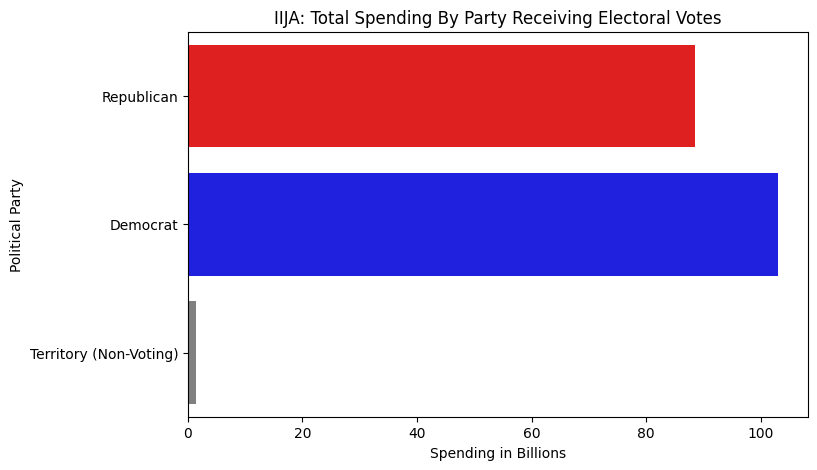

In [495]:
palette = {
    'Republican':'red',
    'Democrat':'blue',
    'Territory (Non-Voting)':'gray',
}
fig, ax1 = plt.subplots(figsize=(8,5))

sns.barplot(
    data=by_party,
    y='Party',
    x='Billions',
    hue='Party',
    palette=palette,
    orient='h',
    ax=ax1
)

ax1.set_xlabel('Spending in Billions')
ax1.set_ylabel('Political Party')
ax1.set_title('IIJA: Total Spending By Party Receiving Electoral Votes')

Text(0.5, 1.0, 'IIJA: Total Spending Per Capita')

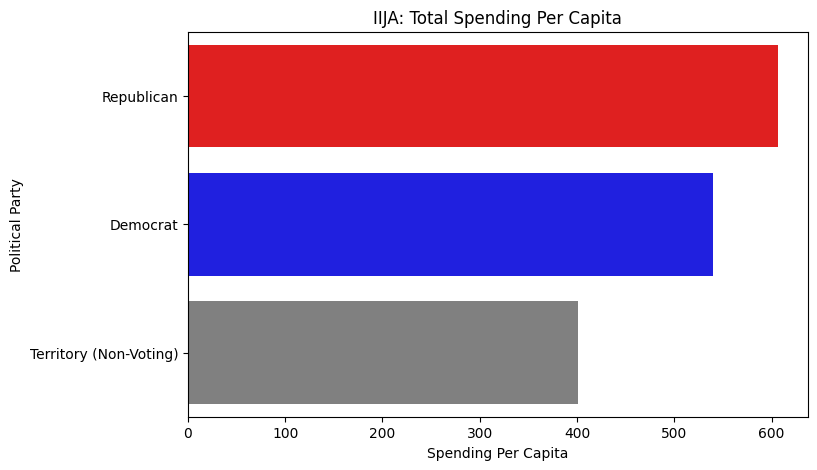

In [496]:
fig, ax2 = plt.subplots(figsize=(8,5))

sns.barplot(
    data=by_party,
    y='Party',
    x='per_capita',
    hue='Party',
    palette=palette,
    orient='h'
)

ax2.set_xlabel('Spending Per Capita')
ax2.set_ylabel('Political Party')
ax2.set_title('IIJA: Total Spending Per Capita')

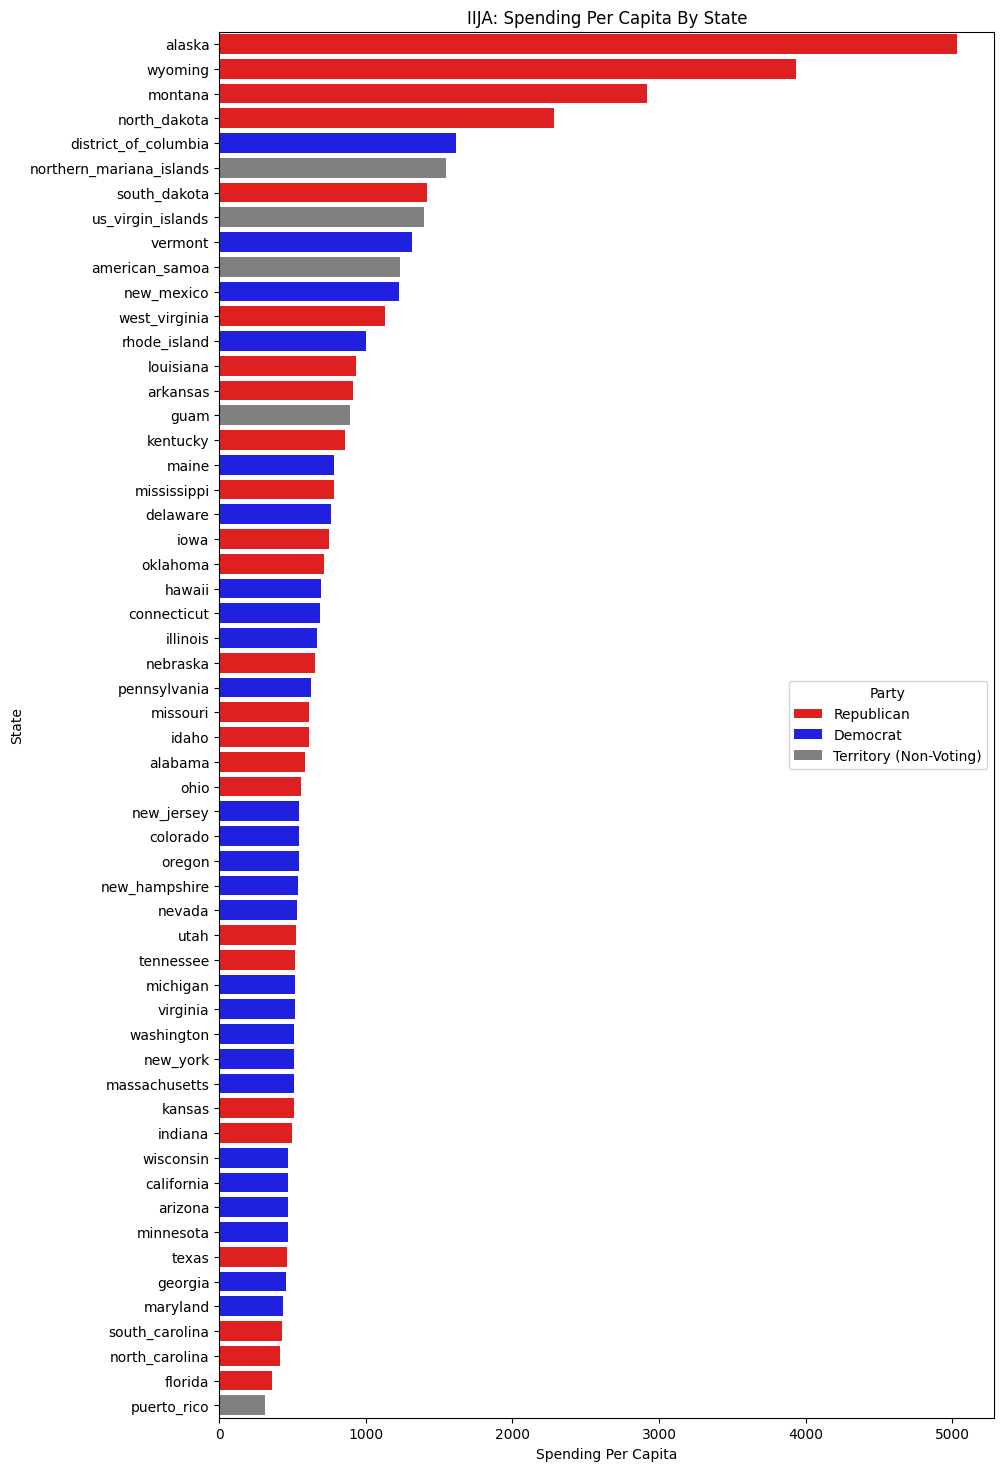

In [497]:
fig, ax3 = plt.subplots(figsize=(10,18))

sns.barplot(
    data=df.sort_values(by='per_capita', ascending=False).reset_index(drop=True),
    y='State',
    x='per_capita',
    hue='Party',
    palette=palette,
    orient='h'
)

ax3.set_xlabel('Spending Per Capita')
ax3.set_ylabel('State')
ax3.set_title('IIJA: Spending Per Capita By State')
sns.move_legend(ax3,'center right')


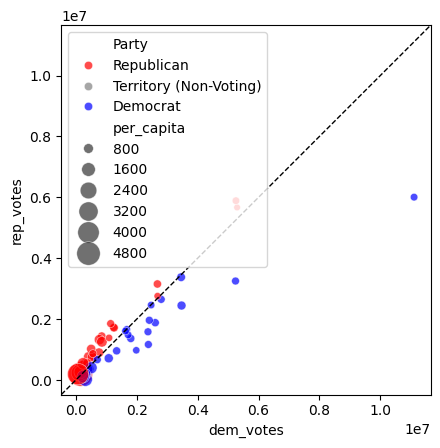

In [498]:
df['total_spending'] = df['Billions']*1000000000
df['pop_to_spending_ratio'] = df['Billions']*1000000000/df['Population']
sns.scatterplot(
    data=df,
    x='dem_votes',
    y='rep_votes',
    hue='Party',
    palette=palette,
    size='per_capita',
    sizes=(20,300),
    alpha=0.7
)

ax = plt.gca()

lims = [
    min(ax.get_xlim()[0], ax.get_ylim()[0]),
    max(ax.get_xlim()[1], ax.get_ylim()[1])
]

ax.plot(lims, lims, linestyle='--', color='black', linewidth=1)
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_aspect('equal', adjustable='box')

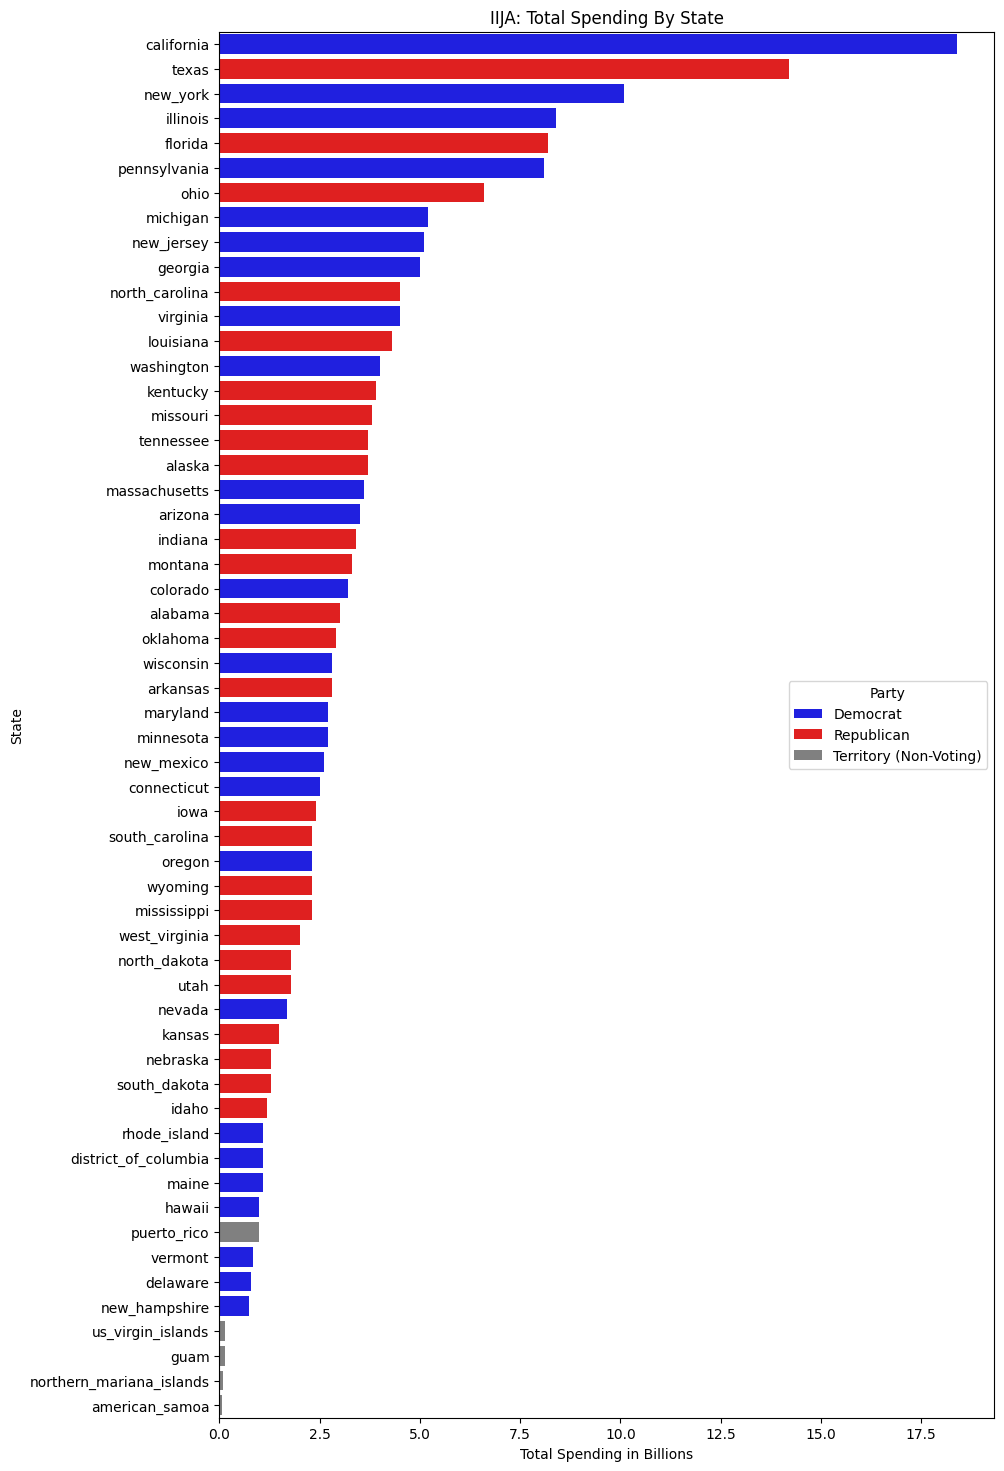

In [499]:
fig, ax4 = plt.subplots(figsize=(10,18))

sns.barplot(
    data=df.sort_values(by='Billions', ascending=False).reset_index(drop=True),
    y='State',
    x='Billions',
    hue='Party',
    palette=palette,
    orient='h'
)

ax4.set_xlabel('Total Spending in Billions')
ax4.set_ylabel('State')
ax4.set_title('IIJA: Total Spending By State')
sns.move_legend(ax4,'center right')


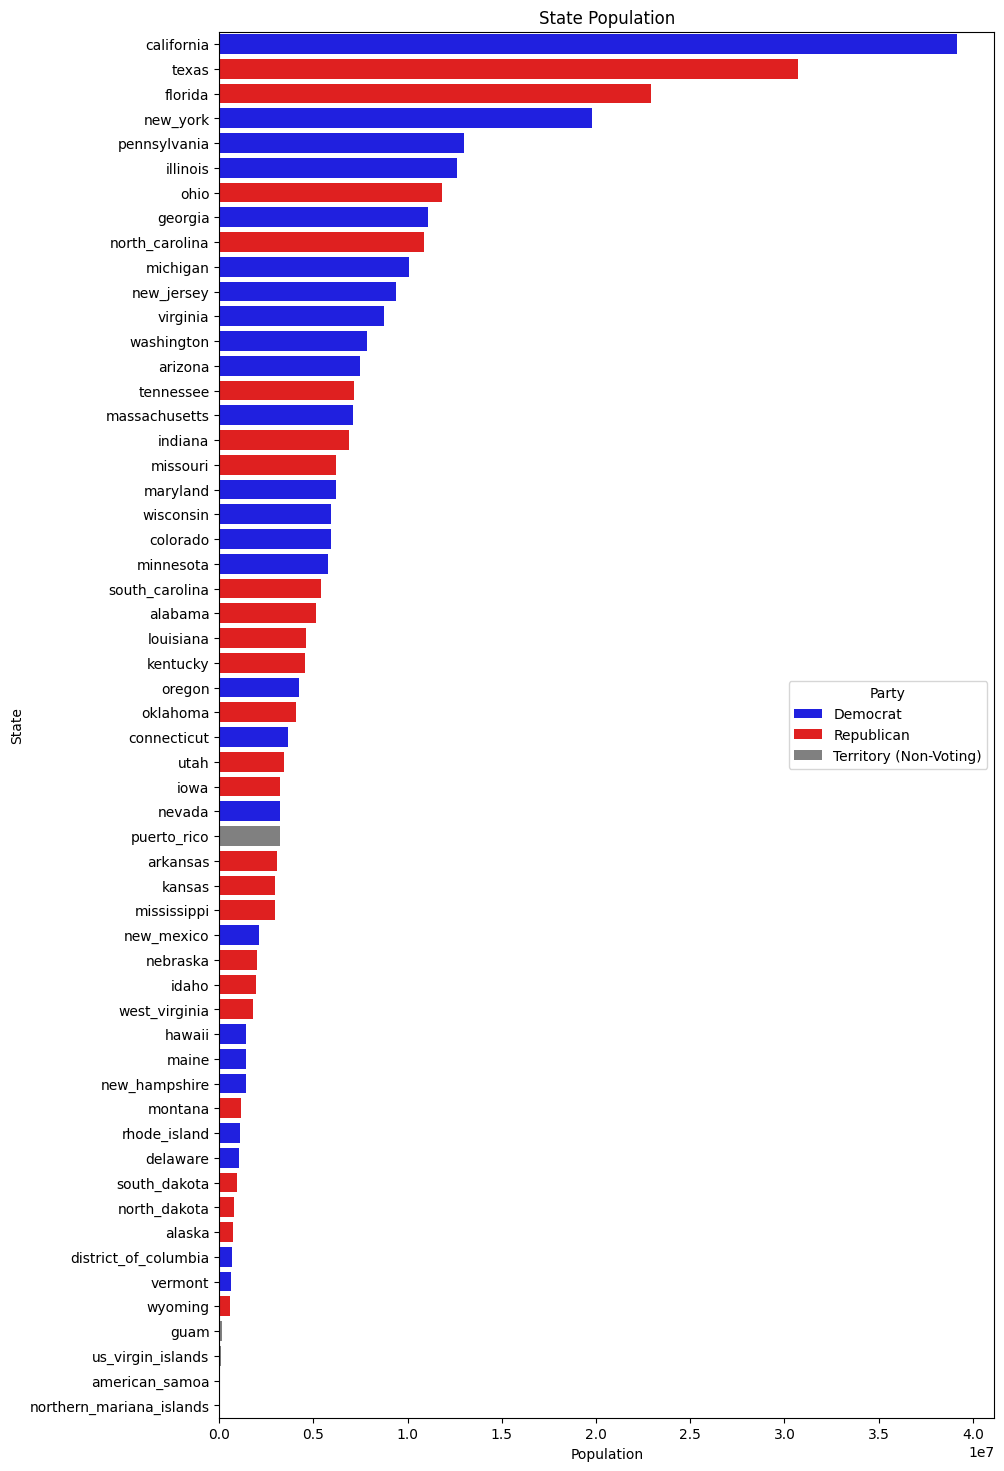

In [500]:
fig, ax4 = plt.subplots(figsize=(10, 18))

sns.barplot(
    data=df.sort_values(by='Population', ascending=False).reset_index(drop=True),
    y='State',
    x='Population',
    hue='Party',
    palette=palette,
    orient='h'
)

ax4.set_xlabel('Population')
ax4.set_ylabel('State')
ax4.set_title('State Population')
sns.move_legend(ax4, 'center right')


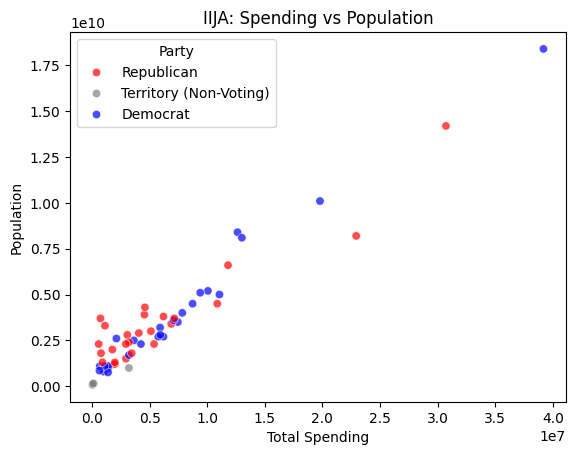

In [501]:
sns.scatterplot(
    data=df,
    x='Population',
    y='total_spending',
    hue='Party',
    palette=palette,
    alpha=0.7
)

ax = plt.gca()



ax.set_xlabel('Total Spending')
ax.set_ylabel('Population')
ax.set_title('IIJA: Spending vs Population')

lims = [
    min(ax.get_xlim()[0], ax.get_ylim()[0]),
    max(ax.get_xlim()[1], ax.get_ylim()[1])
]

#ax.plot(lims, lims, linestyle='--', color='black', linewidth=1)
#ax.set_xlim(lims)
#ax.set_ylim(lims)
#ax.set_aspect('equal', adjustable='box')